## Catchment Hydrology, MSc course
### Lecture 2: Numerical Methods
#### Wouter R. Berghuijs (w.r.berghuijs@vu.nl)

In this notebook you will use a numerical approximation to model a linear reservoir.

The linear reservoir systems looks as follows

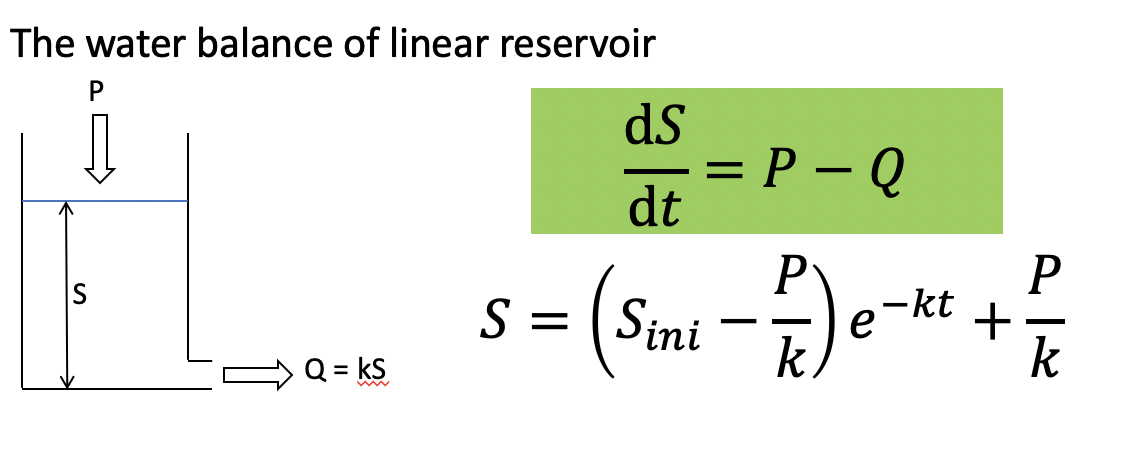

In this system the water balance of the catchment balances inputs (P) and outputs (Q). The output is determined by how much storage there is in the system and a timescale over which this reservoir drains (i.e. Q = kS). If we want to model how the water balance of this system behaves we can use the **analytical solution** for S that **exactly** describes how such a system would behave (see Figure above). However, for many differential equations such a exact solution does not exist (or is very hard to determine). 

Numerical methods for ordinary differential equations are methods used to find numerical approximations to the solutions of differential equations. Many differential equations cannot be solved exactly. For practical purposes, however, a numeric approximation to the solution is often sufficient.

If we want to model how such a system behaves we would need to numerically approximate how storage S (and discharge Q) would vary over time. The most common way to model this is using an **forward Euler method**. This method approximates how the system behaves by the following approximation



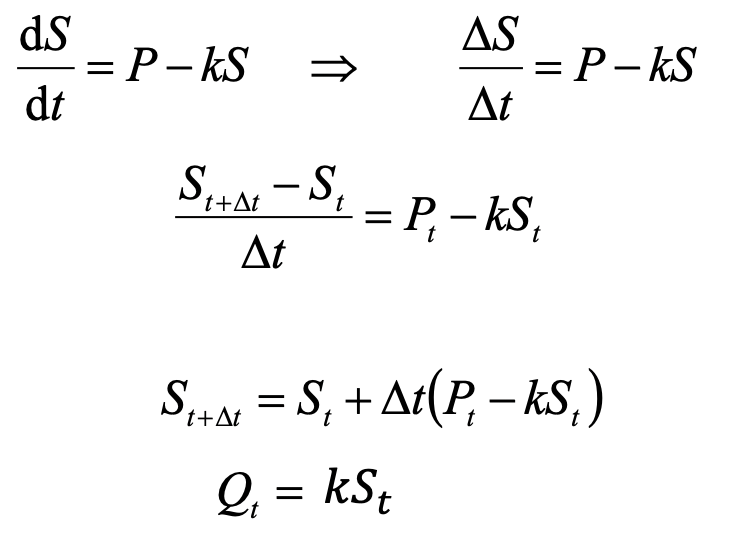

In this approximation we discretize time into small steps ($\Delta t$) whereby $t$ indicates at which timestep we are. We need to realize that the numerical approximation gives an approximation of the answer, and thereby will differ from the exact solution. How accurate the approximation is depends on the size of the timestep (and in this example also the value of k). Let's explore what the effects of $\Delta t$ are. We start with a case where a filled reservoir drains over time (with no incoming rainfall P). Below is a model that programs this.

In [66]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt

def Numericalmodel(dt,numerical_method, k ): 
    t = np.linspace(0,20,int(20/dt))
    if numerical_method == 'forward_euler':
        th_a = [1, 0, 0]
    if numerical_method == 'backward_euler':
        th_a = [0, 0, 1]
    P = 0
        
    Sini = 1
    
    ta = np.linspace(0,max(t),2001)
    Sanal = (Sini-P/k) * np.exp(-k*ta) + P/k

    plt.figure(3)
    #plt.clf()
    for th in th_a: 
        S = [Sini]
        for j in range(1,len(t)):
            S.append(  (S[j-1] + P*dt - (1-th)*k*S[j-1]*dt) / (1+th*k*dt)  )

    plt.subplot(2,2,th*2+1)
    plt.plot(t,S, 'ro-',ta,Sanal,'b')
    plt.title('$\\theta = %.1f; $'%th+'$\Delta t =%.1f; $'%dt+'$k =%.1f$'%k,position=(0.5, 0.85))
    plt.xlabel('time [T]')
    plt.ylabel('Storage [L]')
    plt.subplots_adjust(hspace=.32)
    plt.legend(['Numerical','Analytical'],loc='center right')
    plt.tight_layout()

ipywidgets.interact(Numericalmodel, dt =(0.1 ,5, 0.1), numerical_method = (['forward_euler','backward_euler']),k =(0.01 ,0.5, 0.01))

interactive(children=(FloatSlider(value=2.5000000000000004, description='dt', max=5.0, min=0.1), Dropdown(desc…

<function __main__.Numericalmodel(dt, numerical_method, k)>

## Questions

We can use the slider to adjust the timestep $\Delta t$. In addition, the program can change the numerical method. Make sure this is set to "forward_euler" and that the k value (the timescale) is set to 0.25.

**What do you notice to the precision of the solution when you change the timestep?**

**Does the method tends to over or underestimate how fast the reservoir is draining?**

**Do you ever get physically unrealistic values for storage?**

These above question may have shown you that the numerical method becomes increaslingly inaccurate when the timestep grows. For a very large timestep ($\Delta t > 4$) the method becomes pretty unrealistic as it starts to show negative storage (and then shoots back to too much storage, etc. etc.). Notice that this is when $k*\Delta t$ exceeds one.

**When the reservoir drains quicker (i.e. k >0.25) what happens to the time step that is needed to keep the solution stay realistic (i.e. no overshooting).**

As you can see from these experiments, the forward euler method has strong limitations when being used to estimate the solution of this system. The method starts to give physically unrealistic values when the timestep becomes too large compared to the time it takes the reservoir to drain. 

To avoid this overshooting an alternative methods exist. This method is called **backward euler** and estimates the solution slightly differently.

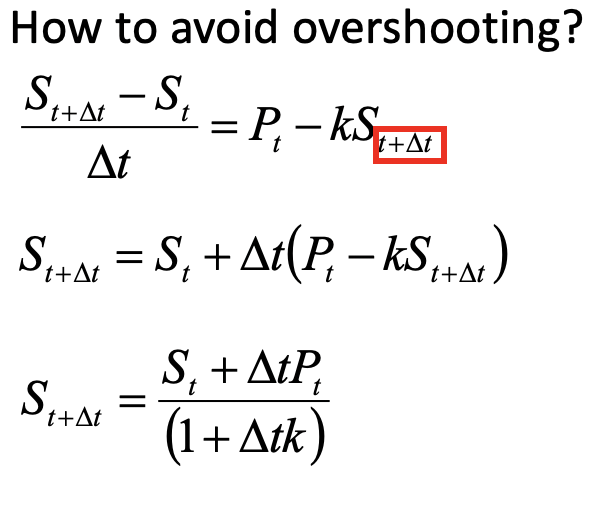

**How is this approximation different than the forward euler method?**

Now rerun the model, but set it to the "backward euler" method.

**What do you notice to the precision of the solution when you change the timestep?**

**Does the method tends to over or underestimate how fast the reservoir is draining?**

**Do you ever get physically unrealistic values for storage?**

So it seems from these results that the backward euler has the advantage that it never shows unrealistic negative values for storage, but it is now still somewhat inaccurate (when the timestep is not very small) as it underestimates how fast the reservoir drains.

The overview below gives a short overview of the advantages of both systems. Forward euler is easier (for many other differential equations it is much easier to derive the forward euler solution compared to the backward euler solution), but the method is only conditionally stable (it may overshoot). The backward euler method is more complex to derive, but has the advantage that it is always stable. 

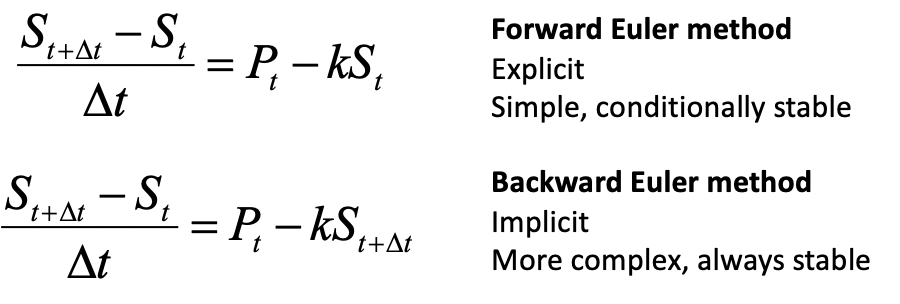

In your homework assignment where you use the Kirchner model, it will be easier to use the forward euler method, but you need to check if the solution is stable. 